## 1- Importing Packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

## 2- Import Dataset

In [5]:
df = pd.read_csv("B:\ML Jadi\Clustering project\KMeans\Customer.csv")

## 3- Preprocessing

### 3-1- Label encoding

In [8]:
le_Gender = preprocessing.LabelEncoder()
le_Gender.fit(df["Gender"].unique())
df["Gender"] = le_Gender.fit_transform(df["Gender"])

### 3-2-  Select features and define X

In [9]:
X = df[["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]

### 3-3- Normalization

In [10]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.fit_transform(X)

## 4- Elbow Method

### interia measures how well a dataset is clustered by measuring the distance between each data point and its centroid

C:\Users\saras\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


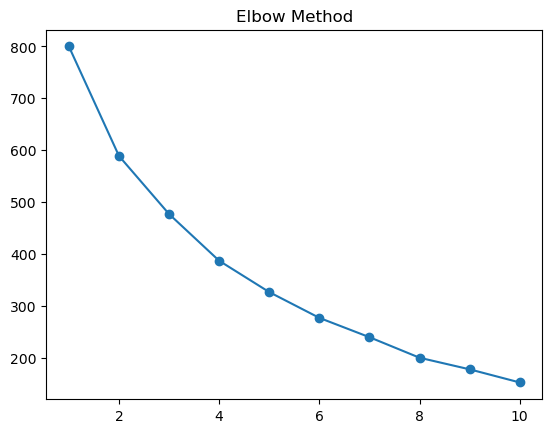

In [11]:
interias = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init="k-means++", n_init=12)
    k_means.fit(X)
    interias.append(k_means.inertia_)
plt.plot(range(1, 11), interias, marker="o")
plt.title("Elbow Method")
plt.show()

### with the help of the elbow method, it is concluded that the optimal number of clusters for the given data and clustering technique is 4 or 5.

## 5- Reducing the dimensionality of the Data

In [12]:
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)
reduced_X = pd.DataFrame(reduced_X)
reduced_X.columns = ['P1', 'P2']

In [14]:
silhouette_scores = []

## 6- Applying K-Means with 4 clusters and visualizing the clusters:

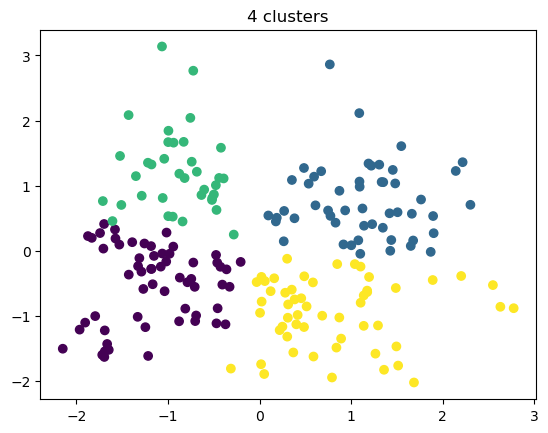

In [15]:
k_means = KMeans(n_clusters=4)
k_means.fit(reduced_X)
silhouette_average_score = silhouette_score(reduced_X, k_means.predict(reduced_X))
silhouette_scores.append(silhouette_average_score)
plt.scatter(reduced_X["P1"], reduced_X["P2"], c=k_means.predict(reduced_X))
plt.title("4 clusters")
plt.show()

## 7- Applying K-Means with 5 clusters and visualizing the clusters:

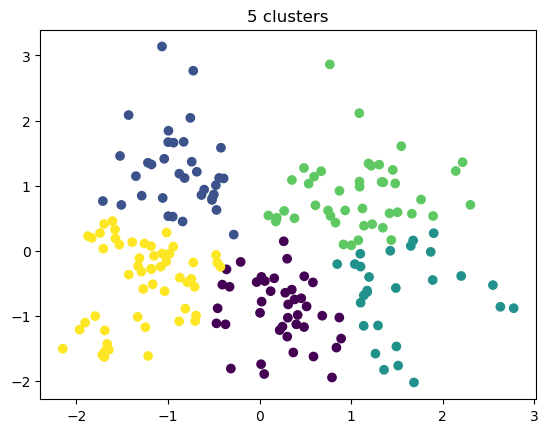

In [16]:
k_means = KMeans(n_clusters=5)
k_means.fit(reduced_X)
silhouette_average_score = silhouette_score(reduced_X, k_means.predict(reduced_X))
silhouette_scores.append(silhouette_average_score)
plt.scatter(reduced_X["P1"], reduced_X["P2"], c=k_means.predict(reduced_X))
plt.title("5 clusters")
plt.show()

## 8- Plotting a bar graph to compare silhouette scores

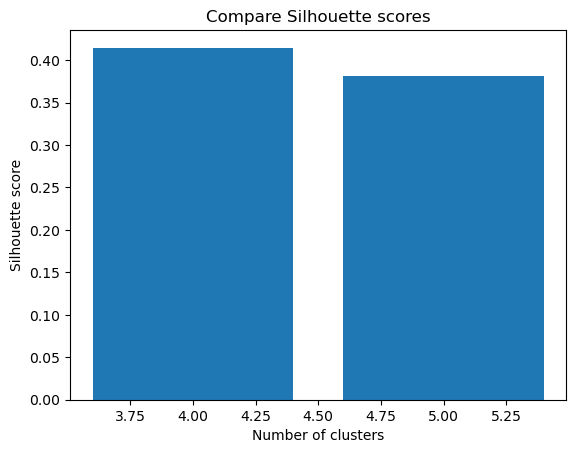

In [18]:
plt.bar(range(4, 6), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title("Compare Silhouette scores")
plt.show()

### So the optimal number of clusters for the given data and clustering technique is 4

## 9- Fit the K-Means model with 4 clusters:

In [19]:
k_means = KMeans(n_clusters=4)
k_means.fit(X)
df["Labels"] = k_means.labels_